<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/DL-CNN%20on%20Pre-trained%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2020-07-07 01:36:34--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2020-07-07 01:36:35--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf14a69bce847b93d2462f98d55.dl.dropboxusercontent.com/cd/0/inline/A7CIVaiXAou8aZjmO5ULDQwGmQzCQYD7lb3-NXUwW9xioNBUorE89vidxNFrZc-Qi4eRW9uGO-oUGHqjsd5tqdgfZTpMenLcV4JKDjsh3iYXTcJYX9wJau1mERqMuNI83ok/file# [following]
--2020-07-07 01:36:35--  https://ucf14a69bce847b93d2462f98d55.dl.dropboxusercontent.com/cd/0/inline/A7CIVaiXAou8aZjmO5ULDQwGmQzCQYD7lb3-NXUwW9xioNBUorE89vidxNFrZc-Qi4eRW9uGO-oUGHqjsd5tqdgfZTpMenLcV4J

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/dogs/dog.1930.jpg  
  inflating: training_set/training_set/dogs/dog.1931.jpg  
  inflating: training_set/training_set/dogs/dog.1932.jpg  
  inflating: training_set/training_set/dogs/dog.1933.jpg  
  inflating: training_set/training_set/dogs/dog.1934.jpg  
  inflating: training_set/training_set/dogs/dog.1935.jpg  
  inflating: training_set/training_set/dogs/dog.1936.jpg  
  inflating: training_set/training_set/dogs/dog.1937.jpg  
  inflating: training_set/training_set/dogs/dog.1938.jpg  
  inflating: training_set/training_set/dogs/dog.1939.jpg  
  inflating: training_set/training_set/dogs/dog.194.jpg  
  inflating: training_set/training_set/dogs/dog.1940.jpg  
  inflating: training_set/training_set/dogs/dog.1941.jpg  
  inflating: training_set/training_set/dogs/dog.1942.jpg  
  inflating: training_set/training_set/dogs/dog.1943.jpg  
  inflating: training_set/training_set/dogs/dog.1944.jpg  
  infl

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19, VGG16
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
img_size = 150
input_shape = (img_size, img_size, 3)

epochs = 20
batch_size = 20

pre_trained_model = VGG19(input_shape = input_shape, include_top=False , weights="imagenet")

In [17]:
for layer in pre_trained_model.layers[:16]:
    layer.trainable = False

for layer in pre_trained_model.layers[16:]:
    layer.trainable = True
    

In [18]:
pre_trained_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [19]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    

In [34]:
last_output.shape

TensorShape([None, 4, 4, 512])

In [24]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)

In [25]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [26]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [28]:
train_img_gen = ImageDataGenerator(rescale=1/.255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_img_gen = ImageDataGenerator(rescale=1/.255)

In [29]:
train_generator = train_img_gen.flow_from_directory(train_data_dir, target_size =(img_width,img_height),batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [30]:
test_genetator = test_img_gen.flow_from_directory(validation_data_dir, target_size =(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 2023 images belonging to 2 classes.


In [33]:
training = model3.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=test_genetator,
                       validation_steps=nb_validation_samples)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 39s 391ms/step - loss: 6.0753 - accuracy: 0.5050 - val_loss: 0.7015 - val_accuracy: 0.4995
Epoch 2/20
100/100 [==============================] - 39s 388ms/step - loss: 0.6937 - accuracy: 0.4895 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 3/20
100/100 [==============================] - 40s 396ms/step - loss: 0.6932 - accuracy: 0.4922 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 4/20
100/100 [==============================] - 39s 387ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
100/100 [==============================] - 39s 387ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 6/20
100/100 [==============================] - 39s 388ms/step - loss: 0.6931 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 7/20
100/100 [==============================] - 

In [35]:
img_size = 150
input_shape = (img_size, img_size, 3)

epochs = 20
batch_size = 20

pre_trained_model_2 = VGG19(input_shape = input_shape, include_top=False , weights="imagenet")

In [36]:
pre_trained_model_2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
for layer in pre_trained_model_2.layers:
    layer.trainable = False


In [41]:
pre_trained_model_2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [46]:
last_layer = pre_trained_model_2.get_layer('block5_pool')
last_output = last_layer.output
    

In [47]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model4 = Model(pre_trained_model_2.input, x)

In [48]:
model4.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [50]:
model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model4.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [51]:
training_4 = model4.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=test_genetator,
                       validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 38s 378ms/step - loss: 21.1788 - accuracy: 0.8535 - val_loss: 4.8874 - val_accuracy: 0.9460
Epoch 2/20
100/100 [==============================] - 38s 375ms/step - loss: 6.6862 - accuracy: 0.9030 - val_loss: 2.0588 - val_accuracy: 0.9455
Epoch 3/20
100/100 [==============================] - 37s 375ms/step - loss: 3.3524 - accuracy: 0.8985 - val_loss: 1.2586 - val_accuracy: 0.9435
Epoch 4/20
100/100 [==============================] - 37s 374ms/step - loss: 1.9032 - accuracy: 0.9043 - val_loss: 0.9111 - val_accuracy: 0.9445
Epoch 5/20
100/100 [==============================] - 37s 375ms/step - loss: 1.4010 - accuracy: 0.8940 - val_loss: 0.7030 - val_accuracy: 0.9390
Epoch 6/20
100/100 [==============================] - 37s 374ms/step - loss: 0.9236 - accuracy: 0.9169 - val_loss: 0.5269 - val_accuracy: 0.9425
Epoch 7/20
100/100 [==============================] - 38s 375ms/step - loss: 0.8018 - accuracy: 0.9038 - val_loss: 0.5184 - val_a

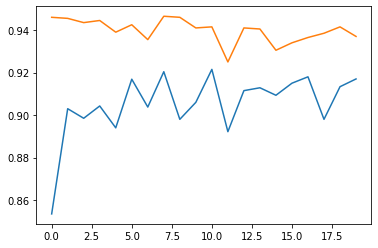

In [62]:
import matplotlib.pyplot as plt
plt.plot(training_4.history.get('accuracy'))
plt.plot(training_4.history.get('val_accuracy'))

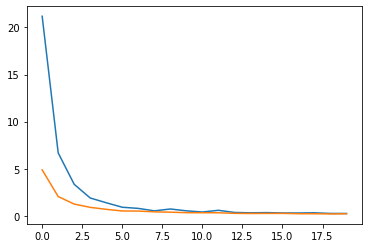

In [63]:
plt.plot(training_4.history.get('loss'))
plt.plot(training_4.history.get('val_loss'))